# Analysis of the atomic properties
- Distribution of atomic properties (alchemical potential, atomic energy, atomisation energy after shifting, rescaling to B3LYP values)
- Atomic distributions split up by element
- Comparison of atomic distributions to distribution of atomisation energies of the full molecules 
- Relation between distribution and structural environment

In [1]:
import numpy as np
import qml
import sys
sys.path.insert(0, '/home/misa/APDFT/prototyping/atomic_energies/')
import qml_interface as qmi
import scipy as sc
import itertools as it

from matplotlib import pyplot as plt
plt.rcParams['font.size'] = 20
%matplotlib notebook

In [2]:
# labels
data, molecule_size = qmi.load_alchemy_data(qmi.wrapper_alch_data())

atomisation_en = qmi.generate_label_vector(data, molecule_size.sum(), value='atomisation')
atomic_en = qmi.generate_label_vector(data, molecule_size.sum(), value='atomic')
alch_pot = qmi.generate_label_vector(data, molecule_size.sum(), value='alch_pot')
charges = qmi.generate_label_vector(data, molecule_size.sum(), value='charge')

In [3]:
idc_by_charge = qmi.partition_idx_by_charge(charges)

In [4]:
kdes_atomic = {1:0, 6:0, 7:0, 8:0}
kdes_alch_pot = {1:0, 6:0, 7:0, 8:0}
kdes_atomic_atomisation = {1:0, 6:0, 7:0, 8:0}

for k in kdes_atomic.keys():
    kdes_atomic[k] = sc.stats.gaussian_kde(atomic_en[idc_by_charge[k]])
    kdes_alch_pot[k] = sc.stats.gaussian_kde(alch_pot[idc_by_charge[k]])
    kdes_atomic_atomisation[k] = sc.stats.gaussian_kde(atomisation_en[idc_by_charge[k]])

x_alch = {1:0, 6:0, 7:0, 8:0}
x_atomic = {1:0, 6:0, 7:0, 8:0}
x_atomic_atomisation = {1:0, 6:0, 7:0, 8:0}
for k in x_atomic.keys():
    if k == 1:
        x_alch[k] = np.linspace(np.amin(alch_pot[idc_by_charge[k]])-0.5, np.amax(alch_pot[idc_by_charge[k]])+0.5, 500)
        x_atomic[k] = np.linspace(np.amin(atomic_en[idc_by_charge[k]])-0.5, np.amax(atomic_en[idc_by_charge[k]])+0.5, 500)
        x_atomic_atomisation[k] = np.linspace(np.amin(atomisation_en[idc_by_charge[k]])-0.5, np.amax(atomisation_en[idc_by_charge[k]])+1.0, 500)
    else:
        x_atomic[k] = np.linspace(np.amin(atomic_en[idc_by_charge[k]])-2.5, np.amax(atomic_en[idc_by_charge[k]])+2.5, 500)
        x_atomic_atomisation[k] = np.linspace(np.amin(atomisation_en[idc_by_charge[k]])-2.5, np.amax(atomisation_en[idc_by_charge[k]])+2.5, 500)
        x_alch[k] = np.linspace(np.amin(alch_pot[idc_by_charge[k]])-0.5, np.amax(alch_pot[idc_by_charge[k]])+0.5, 500)


### Atomisation Energy distribution

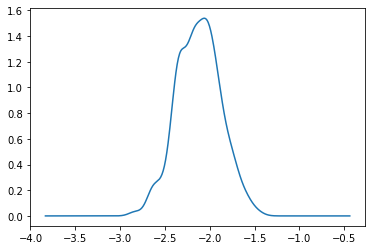

In [5]:
molecule_atomisation = qmi.generate_label_vector(data, len(molecule_size), 'atomisation_global')
kde_molecule = sc.stats.gaussian_kde(molecule_atomisation)
x_molecule = np.linspace(np.amin(molecule_atomisation)-1, np.amax(molecule_atomisation)+1, 500)
fig, ax = plt.subplots(1,1)
ax.plot(x_molecule, kde_molecule.evaluate(x_molecule))

### Distribution of atomic properties - $\mu, E_I, E_I^{\rm{at}}$

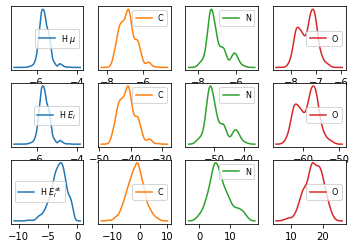

In [6]:
fig, ax = plt.subplots(3,4)
plt.rcParams['figure.figsize'] = [12.0, 4.0]
plt.rcParams['font.size'] = 8

ax[0,0].plot(x_alch[1], kdes_alch_pot[1].evaluate(x_alch[1]), label=r'H $\mu$', color='tab:blue' )
ax[0,1].plot(x_alch[6], kdes_alch_pot[6].evaluate(x_alch[6]), label='C', color='tab:orange' )
ax[0,2].plot(x_alch[7], kdes_alch_pot[7].evaluate(x_alch[7]), label='N', color='tab:green' )
ax[0,3].plot(x_alch[8], kdes_alch_pot[8].evaluate(x_alch[8]), label='O', color='tab:red' )

ax[1,0].plot(x_atomic[1], kdes_atomic[1].evaluate(x_atomic[1]), label=r'H $E_I$', color='tab:blue' )
ax[1,1].plot(x_atomic[6], kdes_atomic[6].evaluate(x_atomic[6]), label='C', color='tab:orange' )
ax[1,2].plot(x_atomic[7], kdes_atomic[7].evaluate(x_atomic[7]), label='N', color='tab:green' )
ax[1,3].plot(x_atomic[8], kdes_atomic[8].evaluate(x_atomic[8]), label='O', color='tab:red' )


ax[2,0].plot(x_atomic_atomisation[1], kdes_atomic_atomisation[1].evaluate(x_atomic_atomisation[1]), label=r'H $E_I^{\rm{at}}$', color='tab:blue')
ax[2,1].plot(x_atomic_atomisation[6], kdes_atomic_atomisation[6].evaluate(x_atomic_atomisation[6]), label='C', color='tab:orange')
ax[2,2].plot(x_atomic_atomisation[7], kdes_atomic_atomisation[7].evaluate(x_atomic_atomisation[7]), label='N', color='tab:green')
ax[2,3].plot(x_atomic_atomisation[8], kdes_atomic_atomisation[8].evaluate(x_atomic_atomisation[8]), label='O', color='tab:red')

for i in list(it.product(range(3), range(4))):#it.product(it.product(range(3), range(4))):
    ax[i].set_yticks([],[])
    
for i in it.product(range(3), range(4)):#it.product(it.product(range(3), range(4))):
    ax[i].legend()

- spread of alchemical potentials similiar to atomisation energy of molecule
- a lot of structure in distribution -> exploration (functional groups...)
- would a representation that has a similar distribution for the distances perform better?


- atomic energies -> rescaling, wide range of energies harder to learn?


- shift to B3LYP leads to change of distribution
- double, triple bonds $\rightarrow$ less hydrogens, energy is partitioned among less atoms 

$\rightarrow$ absolute of atomic energy per atom is higher after shifting to B3LYP values

$\rightarrow$ atomic atomisation energy profile is different than atomic energy profile

#### Structure of alchemical potential distribution

In [7]:
def get_type_closest_neighbour(coords, charges):
    distances = sc.spatial.distance.cdist(coords, coords)
    charge_closest_neighbour = []
    for i in range(len(distances)):
        min_dist = np.amin(distances[i][np.where(distances[i] > 1e-5)])
        charge_closest_neighbour.append(charges[np.where(distances[i]==min_dist)][0])
    return(charge_closest_neighbour)

In [8]:
charge_closest_neighbour = []
for mol in data:
    charge_closest_neighbour.extend(get_type_closest_neighbour(mol[:,1:4], mol[:,0]))
charge_closest_neighbour = np.array(charge_closest_neighbour)

alchpot_sorted_by_neighbour = dict()
for k in idc_by_charge.keys():
    alchpot_sorted_by_neighbour[k] = {1.0:[], 6.0:[], 7.0:[], 8.0:[]}
    for el, alch in zip(charge_closest_neighbour[idc_by_charge[k]], alch_pot[idc_by_charge[k]]):
        alchpot_sorted_by_neighbour[k][el].append(alch)

In [9]:
# ax[0,0].plot(x_alch[1], kdes_alch_pot[1].evaluate(x_alch[1]), label=r'H $\mu$', color='tab:blue' )

kdes = dict()

for k in alchpot_sorted_by_neighbour[1.0].keys():
    if len(alchpot_sorted_by_neighbour[1.0][k]) != 0:
        kdes[k] = sc.stats.gaussian_kde(alchpot_sorted_by_neighbour[1.0][k])

x_kdes = dict()
for k in kdes.keys():
    if len(alchpot_sorted_by_neighbour[1.0][k]) != 0:
        x_kdes[k] = np.linspace(np.amin(alchpot_sorted_by_neighbour[1.0][k])-0.5, np.amax(alchpot_sorted_by_neighbour[1.0][k])+0.5, 500)
        


In [15]:
len(alchpot_sorted_by_neighbour[1.0][8.0])

155

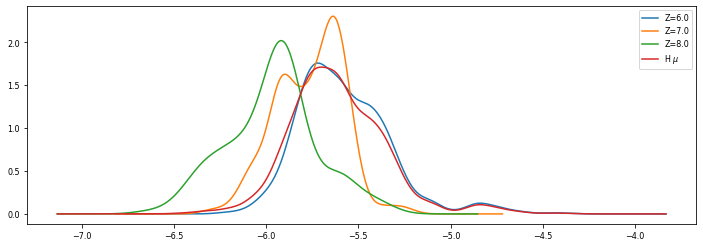

In [16]:
fig, ax = plt.subplots(1,1)
for k in alchpot_sorted_by_neighbour[1.0].keys():
    if k !=1.0:
        ax.plot(x_kdes[k], kdes[k].evaluate(x_kdes[k]), label=f'Z={k}')
ax.plot(x_alch[1], kdes_alch_pot[1].evaluate(x_alch[1]), label=r'H $\mu$')
ax.legend()

In [ ]:
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['font.size'] = 20
ax.plot(x_atomic[1], kdes_atomic[1].evaluate(x_atomic[1])/10, label='H')
ax.plot(x_atomic[6], kdes_atomic[6].evaluate(x_atomic[6]), label='C' )
ax.plot(x_atomic[7], kdes_atomic[7].evaluate(x_atomic[7]), label='N')
ax.plot(x_atomic[8], kdes_atomic[8].evaluate(x_atomic[8]), label='O' )
ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Atomic energy distribution H vs atomisation energy distribution

In [ ]:
molecule_atomisation = qmi.generate_label_vector(data, len(molecule_size), 'atomisation_global')
kde_molecule = sc.stats.gaussian_kde(molecule_atomisation)
x_molecule = np.linspace(np.amin(molecule_atomisation)-1, np.amax(molecule_atomisation)+1, 500)

In [ ]:
mean_atomic_h = qmi.get_average_property(idc_by_charge[1][0], data, molecule_size, 'atomic')[1]
mean_atomisation_mol = molecule_atomisation.mean()

In [ ]:
x_molecule_shifted = (x_molecule - mean_atomisation_mol)
kde_molecule_shifted = sc.stats.gaussian_kde(molecule_atomisation - mean_atomisation_mol)
x_h_shifted = (x_atomic[1] - mean_atomic_h)
kde_h_shifted = sc.stats.gaussian_kde(atomic_en[idc_by_charge[1]] - mean_atomic_h)

In [ ]:
fig, ax = plt.subplots(1,1)
plt.rcParams['font.size'] = 15
ax.plot(x_molecule_shifted, kde_molecule_shifted.evaluate(x_molecule_shifted), label = r'$E_{\rm{at}^{\rm{mol}}}$')
ax.plot(x_h_shifted, kde_h_shifted.evaluate(x_h_shifted), label=r'$E_I^{\rm{H}}$')
ax.set_xlim(-1.5, 1.5)
ax.legend()

the distributions are similar, can we get similar learning curves?

### Learning curve atomic energy of H only

In [ ]:
import numpy as np
import qml
import sys
sys.path.insert(0, '/home/misa/APDFT/prototyping/atomic_energies/')
import qml_interface as qmi
import scipy as sc
import sklearn.model_selection as sk

from matplotlib import pyplot as plt
plt.rcParams['font.size'] = 20
from matplotlib import cm as cmx
import matplotlib.colors as colors

In [ ]:
def crossvalidate(reps, labels, tr_size, sigma, lam, num_cv):
    errors = []
    for cv in range(num_cv):
        reps_tr, reps_test, labels_tr, labels_test = sk.train_test_split(reps,labels,train_size=tr_size)
        coeffs = qmi.train_kernel(reps_tr, labels_tr, sigma, lam_val)
        labels_predicted = qmi.predict_labels(reps_test, reps_tr, sigma, coeffs)
        errors.append((np.abs(labels_predicted - labels_test)).mean())
    errors = np.array(errors)
    return(errors.mean(), errors.std())

In [ ]:
# data preparation
data, molecule_size = qmi.load_alchemy_data(qmi.wrapper_alch_data())

atomic_en = qmi.generate_label_vector(data, molecule_size.sum(), value='atomic')
charges = qmi.generate_label_vector(data, molecule_size.sum(), value='charge')
idc_by_charge = qmi.partition_idx_by_charge(charges)
mean_atomic_h = qmi.get_average_property(idc_by_charge[1][0], data, molecule_size, 'atomic')[1]

molecule_atomisation = qmi.generate_label_vector(data, len(molecule_size), 'atomisation_global')
mean_atomisation_mol = molecule_atomisation.mean()

In [ ]:
all_local_reps = qmi.generate_atomic_representations(data, molecule_size)
h_local_reps = all_local_reps[idc_by_charge[1]]
h_local_labels = atomic_en[idc_by_charge[1]]

In [ ]:
sigmas = np.logspace(-1, 10, 11, base=2)
lam_val = 1e-5
num_cv = 3

lcurves = dict()

# define number of training points for which MAE is calculated
set_sizes = np.logspace(0, 11, 12, base=2).astype(int)

for sigma in sigmas:
    error_cv = []
    error_std = []
    # calculate error for every training point size
    for idx, tr_size in enumerate(set_sizes):
        err, err_std = crossvalidate(h_local_reps, h_local_labels, tr_size, sigma, lam_val, num_cv)
        error_cv.append(err)
        error_std.append(err_std)
    
    lcurves[f'sig_{sigma}'] = np.array([set_sizes, error_cv, error_std]).T

In [ ]:
lcurves

In [ ]:
NUM_COLORS = len(lcurves.keys())
# cm_jet = plt.get_cmap('jet')
# cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
# scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm_jet)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

In [ ]:
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [6.0, 4.0]
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])
for k in lcurves.keys():
    ax.plot(lcurves[k][:,0], lcurves[k][:,1], '-o', label=r'$\sigma = {}$'.format(np.round( float(k.split('_')[1]), 2 )) )
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [ ]:
fig, ax = plt.subplots(1,1)

ax.plot(lcurves['sig_222.8609442038079'][:,0],lcurves['sig_222.8609442038079'][:,1], '-o', label=r'$\sigma = 222$')
ax.plot(lcurves['sig_103.96830673359823'][:,0],lcurves['sig_103.96830673359823'][:,1], '-o', label=r'$\sigma = 104$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Minimum error for training set size of 2048 atoms = 0.012 Ha = 8 kcal/mol

Error in atomisation energy for QM7 molecules with 5000 training points = 5 kcal/mol and 8.5 kcal/mol for 2048 training points (and 5000 test points)

The errors are similar (check distribution of QM7 molecules to make sure they are also comparable)
suggests, that noise in data is not an issue but spread (shift and rescale)

compare to learning curve of 38Ve molecules

### Alchemical potentials vs atomisation energy molecule

In [ ]:
molecule_atomisation = qmi.generate_label_vector(data, len(molecule_size), 'atomisation_global')
kde_molecule = sc.stats.gaussian_kde(molecule_atomisation)
x_molecule = np.linspace(np.amin(molecule_atomisation)-1, np.amax(molecule_atomisation)+1, 500)

In [ ]:
mean_atomisation_mol = molecule_atomisation.mean()

mean_alch_h = qmi.get_average_property(idc_by_charge[1][0], data, molecule_size, 'alch_pot')[1]
mean_alch_c = qmi.get_average_property(idc_by_charge[6][0], data, molecule_size, 'alch_pot')[6]
mean_alch_n = qmi.get_average_property(idc_by_charge[7][0], data, molecule_size, 'alch_pot')[7]
mean_alch_o = qmi.get_average_property(idc_by_charge[8][0], data, molecule_size, 'alch_pot')[8]

delta_values = np.zeros((len(alch_pot)))
delta_values[idc_by_charge[1]] = mean_alch_h
delta_values[idc_by_charge[6]] = mean_alch_c
delta_values[idc_by_charge[7]] = mean_alch_n
delta_values[idc_by_charge[8]] = mean_alch_o

labels_shifted = alch_pot - delta_values

In [ ]:
x_molecule_shifted = (x_molecule - mean_atomisation_mol)
kde_molecule_shifted = sc.stats.gaussian_kde(molecule_atomisation - mean_atomisation_mol)
x_alch_shifted_all = np.linspace(np.amin(labels_shifted)-0.5, np.amax(labels_shifted)+0.5, 500 )
kde_alch_shifted = sc.stats.gaussian_kde(labels_shifted)

x_alch_shifted = dict()
x_alch_shifted[1] = (x_alch[1] - mean_alch_h)
x_alch_shifted[6] = (x_alch[6] - mean_alch_c)
x_alch_shifted[7] = (x_alch[7] - mean_alch_n)
x_alch_shifted[8] = (x_alch[8] - mean_alch_o)

kde_h_shifted = sc.stats.gaussian_kde(alch_pot[idc_by_charge[1]] - mean_alch_h)
kde_c_shifted = sc.stats.gaussian_kde(alch_pot[idc_by_charge[6]] - mean_alch_c)
kde_n_shifted = sc.stats.gaussian_kde(alch_pot[idc_by_charge[7]] - mean_alch_n)
kde_o_shifted = sc.stats.gaussian_kde(alch_pot[idc_by_charge[8]] - mean_alch_o)

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(x_molecule_shifted, kde_molecule_shifted.evaluate(x_molecule_shifted), label = r'$E_{\rm{at}^{\rm{mol}}}$')
ax.plot(x_alch_shifted_all, kde_alch_shifted.evaluate(x_alch_shifted_all), label=r'$\mu$')
ax.legend()

In [ ]:
fig, ax = plt.subplots(1,1)

ax.plot(x_molecule_shifted, kde_molecule_shifted.evaluate(x_molecule_shifted), label = r'$E_{\rm{at}^{\rm{mol}}}$')
ax.plot(x_alch_shifted_all, kde_alch_shifted.evaluate(x_alch_shifted_all), label=r'$\mu$')
ax.plot(x_alch_shifted[1], kde_h_shifted.evaluate(x_alch_shifted[1]), '--', label=r'$\mu_H$')
ax.plot(x_alch_shifted[6], kde_c_shifted.evaluate(x_alch_shifted[6]), '--',label=r'$\mu_C$')
ax.plot(x_alch_shifted[7], kde_n_shifted.evaluate(x_alch_shifted[7]), '--',label=r'$\mu_N$')
ax.plot(x_alch_shifted[8], kde_o_shifted.evaluate(x_alch_shifted[8]), '--',label=r'$\mu_O$')
# ax.set_xlim(-1.5, 1.5)
ax.legend()


In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(x_alch_shifted[1], kde_h_shifted.evaluate(x_alch_shifted[1]), label=r'$\mu_H$')
ax.plot(x_alch_shifted[6], kde_c_shifted.evaluate(x_alch_shifted[6]), label=r'$\mu_C$')
ax.plot(x_alch_shifted[7], kde_n_shifted.evaluate(x_alch_shifted[7]), label=r'$\mu_N$')
ax.plot(x_alch_shifted[8], kde_o_shifted.evaluate(x_alch_shifted[8]), label=r'$\mu_O$')
ax.legend()

### Learning Alch pot

In [ ]:
all_local_reps = qmi.generate_atomic_representations(data, molecule_size)
all_labels = labels_shifted

In [ ]:
sigmas = np.logspace(-1, 10, 11, base=2)
lam_val = 1e-5
num_cv = 3

lcurves = dict()

# define number of training points for which MAE is calculated
set_sizes = np.logspace(0, 11, 12, base=2).astype(int)

for sigma in sigmas:
    error_cv = []
    error_std = []
    # calculate error for every training point size
    for idx, tr_size in enumerate(set_sizes):
        err, err_std = crossvalidate(all_local_reps, all_labels, tr_size, sigma, lam_val, num_cv)
        error_cv.append(err)
        error_std.append(err_std)
    
    lcurves[f'sig_{sigma}'] = np.array([set_sizes, error_cv, error_std]).T

In [ ]:
NUM_COLORS = len(lcurves.keys())
# cm_jet = plt.get_cmap('jet')
# cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
# scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm_jet)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

In [ ]:
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [6.0, 4.0]
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])
for k in lcurves.keys():
    ax.plot(lcurves[k][:,0], lcurves[k][:,1], '-o', label=r'$\sigma = {}$'.format(np.round( float(k.split('_')[1]), 2 )) )
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

- the error is higher than for atomic energies (check for bugs, overwritten variables...)

$\rightarrow$ rescaling and shifting is probably not the issue

the surface is non smooth, rescaling does not help makes it even more non smooth

$\rightarrow$ change of representation could help

- also learning only H is easier (maybe smoother)
$\rightarrow$ learn all elements individually

what is the optimal representation? 
$\rightarrow$  investigate label distribution, distance distribution (for all together/single element)

deep neural networks are supposed to work better for non smooth systems

In [ ]:
lcurves['sig_48.50293012833276']